In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import special

/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_87932/3519555662.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Lecture 21

## Students Flipping Fair Coins Conclude Coin is Unfair!

Suppose there are 2000 CS Majors and each student:
* is given a fair coin by the instructor but _they are not told that it is a fair coin_
* **collects data** by flipping the coin **160 times** and counts the number of times it lands Heads
* runs a **hypothesis test**:
    * **Null Hypothesis:** They were given a fair coin and the number of heads observed see is due to chance.
    * **Alternative Hypothesis:** The coin is biased and so the number of heads they observed is not due to chance alone.
    * **Test Statistic:** abs(num_heads - 80)
* Uses the null probability distribution to report their *p-value* and rejects the null hypothesis **if their p-value is less than 0.05**

We know that **we gave all of them fair coins**.  How often will they **incorrectly reject the null hypothesis?**

### Test Statistic:
For this example, since we're interested in ANY difference from fair (ie the coin can be biased towards either heads or tails) we're going to use the test statistic |Num heads -80|.   



## Simulating the Test Statistic Under the Null Hypothesis
Let's write code to simulate the process of one student running this hypothesis test: 

In [2]:
#Simulate flipping a fair coin 160 times and counting number of heads:
np.random.binomial(160, 0.5)

76

In [3]:
# Define the test statistic:  abs(num_heads - 80)

#Input number of heads out of num_flips
def test_statistic(num_heads, num_flips):
    return np.abs(num_heads - num_flips/2)

In [4]:
def simulate_distribution_test_statistic(num_flips, num_simulations):
    #Conduct experiment (flip coin num_flips times)
    
    return np.array([test_statistic((np.random.binomial(num_flips, 0.5)), num_flips) for i in range(num_simulations)])
    
    
    
    

In [5]:
simulate_distribution_test_statistic(160, 10)

array([ 8., 10.,  2.,  6.,  5.,  6.,  4.,  2.,  1.,  1.])

Text(0.5, 1.0, 'Simulated Distribution of Test Statistic assuming fair coin')

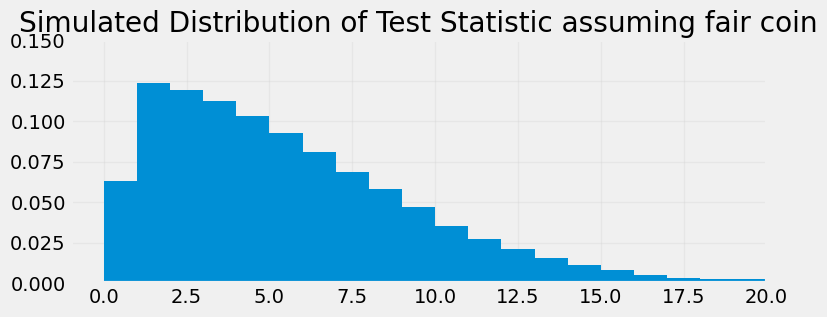

In [9]:
#Plot simulated test distribution:


num_sim=100000

simulated_statistics = simulate_distribution_test_statistic(160, num_sim)

fig, ax = plt.subplots(1,1,figsize=(8,3))

ax.hist(simulated_statistics,density=True, bins=np.arange(21));
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
ax.set_xlim(-1,20)
ax.set_ylim(0, .15)
ax.set_title("Simulated Distribution of Test Statistic assuming fair coin")



In [10]:

def simulate_one_student(num_flips, p_heads, plot=False):
    
    
    #Conduct experiment (flip coin num_flips times)
    obs_flips = np.random.binomial(num_flips,p_heads)

    
    # Compute the observed value of the statistic on our actual data
    obs_statistic = test_statistic(obs_flips, num_flips)
    
    p_value = sum(simulated_statistics>=obs_statistic)/num_sim
    
    
    if plot==True:
    
        fig, ax = plt.subplots()
        
        ax.hist(simulated_statistics,density=True, bins=np.arange(21));
        ax.set_axisbelow(True)
        ax.grid(alpha=0.25)
        ax.set_xlim(-1,20)
        ax.set_ylim(-.02, .15)
        ax.set_title("Simulated Distribution of Test Statistic assuming fair coin")
        

        #Add a dot for the observed statistic
        plt.scatter(obs_statistic, -0.001, color='red', s=70);
    
   
    return int(obs_statistic), p_value

(2, 0.81402)

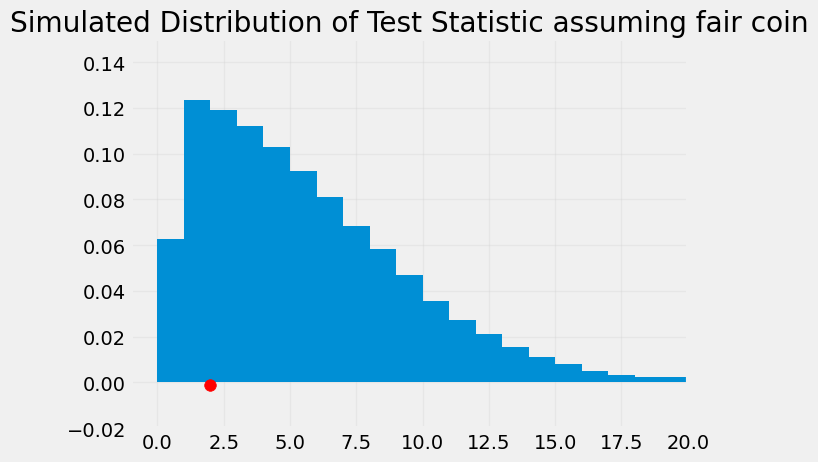

In [11]:
simulate_one_student(160,0.5, plot=True)

# Case 1: Fair Coin:   Simulate 160 coin tosses by each student, for 500 students total. How many of the 500 students conducting this hypothesis test will CORRECTLY reject the null?
How many of the 2000 simulations resulted in an empirical p-value <=0.05?

In [12]:
num_students = 500

p_heads = 0.5

sim_500 = np.array([simulate_one_student(160,p_heads, plot=False) for i in np.arange(num_students)])

print("Number of students out of", str(num_students)," with p-value <= 0.05 =  ", str(sum(sim_500[:,1]<=0.05)))

Number of students out of 500  with p-value <= 0.05 =   17


## Analyzing Power of Test:


### Definition:  The Power of a hypothesis test is the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true.

**Convention: We usually try to design hypothesis tests so that the power is at least 80%.**  
Power is affected by 
 - Significance level (p-value cutoff)
 - Sample size
 - Effect size
 
Let's experiment with how these 3 factors can affect the power of the test: 

Suppose in reality the coin is actually biased such that P(H) = 0.45 (i.e. your null hypothesis is actually wrong).

You don't know this, so your null hypothesis remains the same.  Let's look at how often we correctly reject the null in this case.

* **Null Hypothesis:** Coins are fair
* **Alternative Hypothesis:** Coins are biased.
* **Test Statistic:** Absolute difference between number of heads and 50% heads.


# What if coin wasn't actually fair?  
Suppose the coin was biased such that P(H) = 0.45

# Case 2: If in reality the coins were actually biased (p(H) = 0.45), how many of the 500 students conducting this hypothesis test will CORRECTLY reject the null?

In [20]:
num_students = 500

p_heads = 0.45

sim_500_biased = np.array([simulate_one_student(160,p_heads, plot=False) for i in np.arange(num_students)])

print("Number of students out of", str(num_students)," with p-value <= 0.05 =  ", str(sum(sim_500_biased[:,1]<=0.05)))

Number of students out of 500  with p-value <= 0.05 =   114


Thus, in this scenario, the power is approximately 109/500 (i.e. approximately 22%), which is not great from an error standpoint.

#### If we want to keep significance fixed, how could we increase the power of this test?


### Example 2:


---

## Super Soda Co and the Case of Bad Taste

Manufacturers of Super Soda run a taste test and 91 out of 200 tasters prefer Super Soda over its rival.  The boss is upset!  He asks:

    Do fewer people prefer Super Soda, or is this just chance?
    
You run a hypothesis test:

* **Null Hypothesis:** Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
* **Alternative Hypothesis:** Fewer people in the population prefer Super Soda than its Rival.
* **Test Statistic:** Number of people who prefer Super Soda


You pick a **significance level (i.e. p-value cutoff) of 0.05**

### Null Hypothesis Distribution:
What probability distribution models our null hypothesis?  Plot a histogram of this distribution AND a red dot with the observed test statistic.


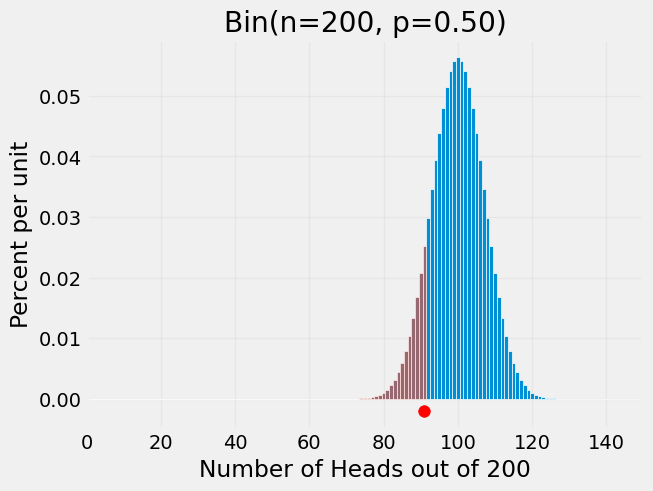

In [14]:
n=200
k = np.arange(n+1)
#Probability for a binomial distribution with p=0.50
p = special.comb(n, k)*(0.50**k)*(0.50**(n-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(0,int(n*3/4))
plt.title("Bin(n="+str(n)+", p=0.50)");
plt.xlabel("Number of Heads out of "+str(n))
plt.ylabel("Percent per unit")


obs_stat=91

#Add a dot for the observed statistic
plt.scatter(obs_stat, -0.002, color='red', s=70);
#Shade in the p-value   
ax.bar(np.arange(n+1)[np.arange(n+1)<=obs_stat], p[np.arange(n+1)<=obs_stat], width=1, ec='white',alpha=0.6);



### Theoretical P-Value

In [15]:
#Since we have the theoretical probability distribution,
#the p-value is just the sum of the probabilities for X<=91
actual_p_val = sum(p[np.arange(n+1)<=obs_stat])

actual_p_val


0.11462329862986695

## Conclusion of Test:

Since 0.11>0.05, we **fail to reject** the null hypothesis that equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.


---

## Empirical P-Value:  The Importance of Number of Simulations.

What if we didn't know the theoretical distribution?  How does the theoretical p-value compare to simulated p-values?  Suppose we're simulating the null hypothesis (instead of using the actual theoretical distribution).  Let's examine how the number of simulations we use affects how accurate our empirical p-value estimate is.


In [16]:
#Simulate the number of heads when randomly flipping a fair coin 200 times

def simulate_one_count(sample_size):
    return np.count_nonzero(np.random.choice(['H', 'T'], sample_size) == 'H')
simulate_one_count(200)

102

## Changing the number of simulations

In [17]:
# Keeping the observed test statistic fixed, 
# we can re-run the test with a new simulation under the null

def run_test(num_simulations, sample_size):
    counts=np.array([simulate_one_count(sample_size) for i in range(num_simulations)])
    return counts

counts = run_test(10000, 200)
print("Actual (theoretical) p-value: ", actual_p_val)
print("Empirical (simulated) p-value using 10000 simulations: ", np.count_nonzero(counts <= 91)/len(counts))
print(sum(counts<=91)/10000)
print(np.mean(counts<=91))
print((counts<=91).mean())
print(np.sum(counts<=91)/10000)

Actual (theoretical) p-value:  0.11462329862986695
Empirical (simulated) p-value using 10000 simulations:  0.1113
0.1113
0.1113
0.1113
0.1113


In [18]:
# Let's see how the empirical p-value varies with the
# number of siulations:  
tests = pd.DataFrame(columns=['simulations', 'p-value for 91'])
    
for num_sims in [100, 1000, 10000]:
    for k in np.arange(50):
        counts = run_test(num_sims, 200)
        tests.loc[len(tests.index)] = [num_sims, 
            np.count_nonzero(counts <= 91)/len(counts)] 
 


tests

,simulations,p-value for 91
0,100.0,0.1000
1,100.0,0.1300
2,100.0,0.1500
3,100.0,0.1900
4,100.0,0.1600
...,...,...
145,10000.0,0.1145
146,10000.0,0.1165
147,10000.0,0.1134
148,10000.0,0.1201


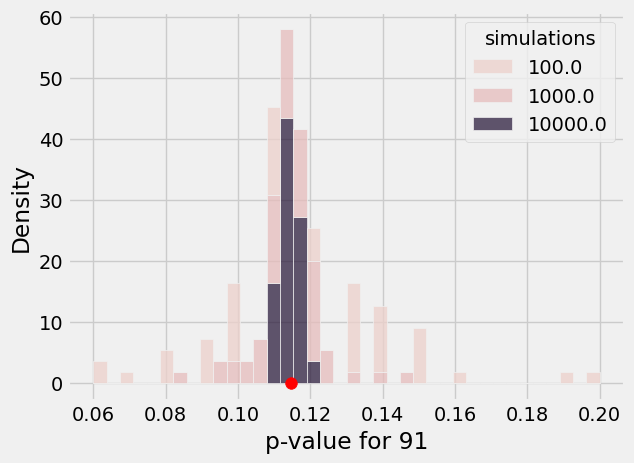

In [19]:
# For larger numbers of simulations, p-values are more consistent
# Since a large number of simulations provides a good estimate of the
# theoretical distribution of the test statistic under the null hypothesis:

sns.histplot(data=tests, x="p-value for 91", hue="simulations", multiple="stack",stat="density")
plt.scatter(actual_p_val, -0.002, color='red', s=70);

## Analyzing Power of Test:


### Definition:  The Power of a hypothesis test is the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true.

**Convention: We usually try to design hypothesis tests so that the power is at least 80%.**  
Power is affected by 
 - Significance level (p-value cutoff)
 - Sample size
 - Effect size
 
Let's experiment with how these 3 factors can affect the power of the test: 

Suppose in reality the true proportion of people who prefer Super Soda is 45% (i.e. your null hypothesis is actually wrong).

You don't know this, so your null hypothesis remains the same.  Let's look at how often we correctly reject the null in this case.

* **Null Hypothesis:** Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
* **Alternative Hypothesis:** Fewer people in the population prefer Super Soda than its Rival.
* **Test Statistic:** Number of people who prefer Super Soda


In [ ]:
# Suppose that the true proportion of people who prefer Super Soda is 45%
true_proportion = 0.45
true_distribution = [true_proportion, 1 - true_proportion]
true_distribution

In [ ]:
# Taste tests with 200 people will give various numbers of people who prefer Super Soda
sample_size = 200

np.random.binomial(sample_size, true_distribution).item(0)


In [ ]:
 
# Suppose in the actual population, 45% of people like Super Soda
# Let's run a taste test for 200 people, 
# and calculate the p-value:

def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = [true_proportion, 1 - true_proportion]
    taste_test_results = np.random.binomial(sample_size, true_distribution)
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    counts = run_test(num_simulations, sample_size)
    p_value = np.count_nonzero(counts <= observed_stat_from_this_sample) / len(counts)
    return p_value

("P-value from one experiment:", run_experiment(10000, 200, 0.45))

In [ ]:
# Let's imagine running our taste test over and over again to see how often 
# we correctly reject the null:

true_proportion = 0.45
sample_size = 650

p_values=np.array([run_experiment(1000,sample_size,true_proportion) for i in range(100)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



### Determining Sample Size for Power of 80%:
#### If the true proportion of people who like Super Soda is 0.45, what Sample Size do we need to use to correctly reject our null hypothesis (that the proportion is 0.5) at least 80% of the time?  (i.e. what sample size do we need to get a Power of at least 80%)?

In [ ]:
true_proportion = 0.45

sample_size = 600

p_values=np.array([run_experiment(1000,sample_size,true_proportion) for i in range(100)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



### Effect Size:
**Effect Size**:  The difference between the true proportion and the null hypothesis proportion.
#### Experiment with different effect sizes.  How does the power of the test change as you change the effect size ?

In [ ]:
true_proportion = .48
sample_size = 200

p_values=np.array([run_experiment(1000,sample_size,true_proportion) for i in range(100)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



Making the effect size larger and keeping the same sample size the same (200) leads to a larger power of the test (we're more likely to be able to correctly reject the null). 
Similarly, if we decrease the effect size, we will need a larger sample size to keep the same level of power. 